# Data cleaning and creating a labeled dataset

## Data cleaning

In [1]:
# Import libraries

import pandas as pd
import numpy as np 
import seaborn as sns

### Inspection
First import the files and expect the first rows to know what kind of data is in the files.

In [2]:
# Import files
products = pd.read_csv('data\\products.csv')
products.head()

,key,name,subhead,description,rating,rating_count,ingredients
0,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [3]:
reviews = pd.read_csv('data\\reviews.csv')
reviews.head()

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...


#### Merge files
Both datasets have a column 'key'. This ID makes it possible to merge both files.

In [4]:
bj = pd.merge(reviews,products)
bj.head(3)

,key,author,date,stars,title,helpful_yes,helpful_no,text,name,subhead,description,rating,rating_count,ingredients
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for...",Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."


#### Inspect datatypes
Convert datatypes where needed.

In [5]:
# Data types 
bj.dtypes

key              object
author           object
date             object
stars             int64
title            object
helpful_yes       int64
helpful_no        int64
text             object
name             object
subhead          object
description      object
rating          float64
rating_count      int64
ingredients      object
dtype: object

In [6]:
# Convert date column to datetime
bj['date'] = pd.to_datetime(bj['date'])

#### Drop empty rows and duplicates

In [7]:
# Number of records
print('Number of records:', len(bj))

Number of records: 7943


In [8]:
# Inspect missing values per column
bj.isna().sum()

key                0
author           284
date               0
stars              0
title           2611
helpful_yes        0
helpful_no         0
text               0
name               0
subhead            0
description        0
rating             0
rating_count       0
ingredients        0
dtype: int64

Since the title columns is of limited use to the analysis, this column is removed.

In [9]:
# Drop title column
bj = bj.drop(['title'], axis=1)
bj.isna().sum()

key               0
author          284
date              0
stars             0
helpful_yes       0
helpful_no        0
text              0
name              0
subhead           0
description       0
rating            0
rating_count      0
ingredients       0
dtype: int64

In [10]:
# Drop empty rows
bj = bj.dropna()
print('Number of records without empty rows:', len(bj))

Number of records without empty rows: 7659


In [11]:
# Drop duplicates 
bj = bj.drop_duplicates()
print('Number of records without duplicates:', len(bj))

Number of records without duplicates: 7659


### Calculating with columns

In [12]:
# Text length of reviews
bj['text_len'] = bj['text'].str.len()

In [13]:
# Ratio helpful votes
bj['ratio_helpful'] = bj['helpful_yes'] / (bj['helpful_yes'] + bj['helpful_no'])
bj.head(3)

,key,author,date,stars,helpful_yes,helpful_no,text,name,subhead,description,rating,rating_count,ingredients,text_len,ratio_helpful
0,0_bj,Ilovebennjerry,2017-04-15,3,10,3,"Super good, don't get me wrong. But I came for...",Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",603,0.769231
1,0_bj,Sweettooth909,2020-01-05,5,3,0,I decided to try it out although I’m not a hug...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",651,1.000000
2,0_bj,LaTanga71,2018-04-26,3,5,2,My caramel core begins to disappear about half...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",715,0.714286


### Characteristics

In [14]:
# Number of records
print('Number of records:', len(bj))

Number of records: 7659


In [15]:
# First and last review date
print('Earliest date', bj['date'].min())
print('Latest date', bj['date'].max())

Earliest date 2017-02-09 00:00:00
Latest date 2020-09-24 00:00:00


In [16]:
# Character length of reviews
print('Max length of reviews:', bj['text_len'].max())
print('Min length of reviews:', bj['text_len'].min())
print('Mean length of reviews (rounded):', round(bj['text_len'].mean()))

Max length of reviews: 1691
Min length of reviews: 14
Mean length of reviews (rounded): 216


In [17]:
# Ice cream flavors ordered by number of reviews (descending)
reviews_count = bj['name'].groupby(bj['name']).count().sort_values(ascending=False)

# Store it in a dataframe
reviews_count = pd.DataFrame({'Name':reviews_count.index, 'Reviews_count':reviews_count.values})
reviews_count

,Name,Reviews_count
0,Chocolate Chip Cookie Dough,927
1,Half Baked®,829
2,The Tonight Dough®,596
3,Americone Dream®,354
4,Coffee Toffee Bar Crunch,293
5,Gimme S’more!™,276
6,Oat of This Swirled™,248
7,Strawberry Cheesecake,221
8,Salted Caramel Core,204
9,Chocolate Fudge Brownie,197


### Visualisation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(3.9250000000000043, 0.5, 'Number of reviews')

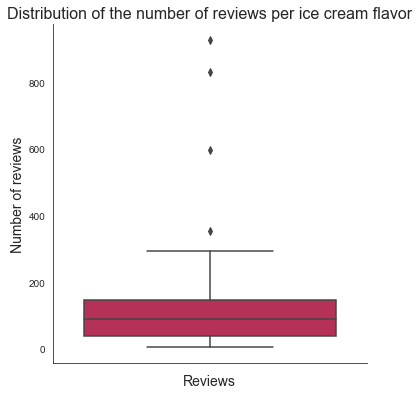

In [18]:
# Dispersion of the number of reviews per ice cream flavor
sns.set_style("white")
sns.catplot(y="Reviews_count", kind="box", data=reviews_count, height=5, aspect=1, palette="rocket")
plt.title('Distribution of the number of reviews per ice cream flavor', fontsize=16)
plt.xlabel('Reviews', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Ice cream flavor')

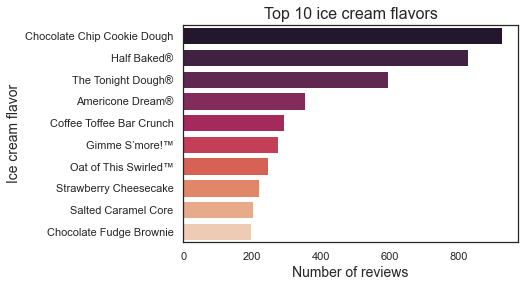

In [19]:
# Top 10 flavours with most reviews
reviews_count_10 = reviews_count.head(10)

# Visualise
sns.set_theme(style="white")
sns.barplot(y="Name", x='Reviews_count', data=reviews_count_10, palette="rocket")
plt.title('Top 10 ice cream flavors', fontsize=16)
plt.xlabel('Number of reviews', fontsize=14)
plt.ylabel('Ice cream flavor', fontsize=14)

### Create a labeled dataset
People add a star rating to their reviews. This will be used to create a labeled dataset.

In [20]:
# Convert stars to sentiment categories (0 = negative sentiment, 1 = positive sentiment)
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

bj["sentiment"] = bj["stars"].map(sentiment)
bj.head(3)

,key,author,date,stars,helpful_yes,helpful_no,text,name,subhead,description,rating,rating_count,ingredients,text_len,ratio_helpful,sentiment
0,0_bj,Ilovebennjerry,2017-04-15,3,10,3,"Super good, don't get me wrong. But I came for...",Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",603,0.769231,0
1,0_bj,Sweettooth909,2020-01-05,5,3,0,I decided to try it out although I’m not a hug...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",651,1.000000,1
2,0_bj,LaTanga71,2018-04-26,3,5,2,My caramel core begins to disappear about half...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",715,0.714286,0


In [21]:
# Add extra column with sentiment category
bj["sentiment_cat"] = bj['sentiment'].replace([0,1], ['negative', 'positive'])
bj.head(3)

,key,author,date,stars,helpful_yes,helpful_no,text,name,subhead,description,rating,rating_count,ingredients,text_len,ratio_helpful,sentiment,sentiment_cat
0,0_bj,Ilovebennjerry,2017-04-15,3,10,3,"Super good, don't get me wrong. But I came for...",Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",603,0.769231,0,negative
1,0_bj,Sweettooth909,2020-01-05,5,3,0,I decided to try it out although I’m not a hug...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",651,1.000000,1,positive
2,0_bj,LaTanga71,2018-04-26,3,5,2,My caramel core begins to disappear about half...,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",715,0.714286,0,negative


## Data preprocessing

### Balance dataset

In [22]:
# Check balance in dataset
bj['sentiment'].value_counts()

1    6155
0    1504
Name: sentiment, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of reviews')

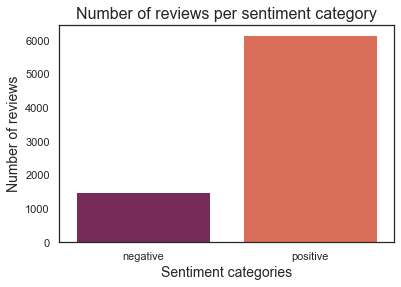

In [23]:
# Visualise
sns.set_theme(style="white")
sns.countplot(x="sentiment_cat", data=bj, palette='rocket')
plt.title('Number of reviews per sentiment category', fontsize=16)
plt.xlabel('Sentiment categories', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)

The positive reviews are highly over-represented. There are several ways to balance a dataset. One (good) option is to gather more data. In this case, we balance the dataset by taking a sample of the positive reviews that is equally large as the number of negative reviews.

In [24]:
# Put sentiment categories in seperate dataset
sentiment0 = bj.loc[bj['sentiment'] == 0]
sentiment1 = bj.loc[bj['sentiment'] == 1]

In [25]:
# Take a sample of sentiment == 1 dataset as big as sentiment 0 dataset
len_negative = len(sentiment0)
sentiment1 = sentiment1.sample(len_negative)

In [26]:
# Merge datasets into 1 dataset
frames = [sentiment0, sentiment1]
bj = pd.concat(frames)
len(bj)

3008

1    1504
0    1504
Name: sentiment, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of reviews')

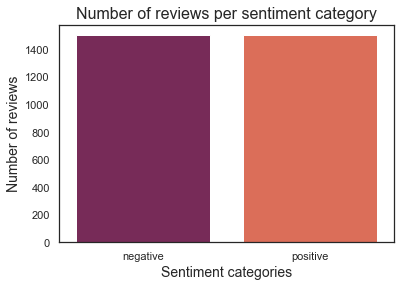

In [27]:
# Double check if the dataset is balanced now
print(bj['sentiment'].value_counts())

sns.set_theme(style="white")
sns.countplot(x="sentiment_cat", data=bj, palette='rocket')
plt.title('Number of reviews per sentiment category', fontsize=16)
plt.xlabel('Sentiment categories', fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)

In [28]:
# Save the cleaned data in dataframe
bj.to_csv('data\\cleaned_bj.csv', index=False)